### Figure Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import gridspec


#### Numerical Solution of Equation

Want to solve $\frac{dT}{dt} = Q - \lambda T$ with $Q$ a sinosoidal forcing

$Q = b \sin({\omega t}) + Q_0$

Solve for $T$ numerically using `scipy.integrate.odeint` and then plot in time and temperature coordinates

In [2]:
def ode(y,t,b,omega,Q_0,lam):
    T = y
    Q = b*np.cos(omega*t)+Q_0
    dydt = Q - lam*T
    return dydt

In [3]:
t = np.linspace(0, 100, 1001)


In [4]:
def plot_time_space_subplots(ax, Q_0,lam, IC,color):
    b = 1
    omega = 1
    y0 = IC
    sol = odeint(ode, y0, t, args=(b, omega,Q_0, lam))
    Q_t = b*np.cos(omega*t)+Q_0
    lambda_T_t = -lam*sol[:,0]

    ax.plot(t, sol[:,0], color, label='T(t)')
    #plt.plot(t, Q_t+lambda_T_t, 'g', label='dT/dt(t)')
    ax.plot(t, Q_t, 'k', label='Q(t)')
    #plt.plot(t, lambda_T_t, 'm', label='-$\lambda$T(t)')

    ax.legend(loc='lower left')
    ax.grid()
    ax.set_xlim(0,40)

In [8]:
def plot_time_space_subplots_analytic(ax, Q_0,lam, IC,color):
    b = 1
    omega = 1
    y0 = IC
    sol = b/np.sqrt(lam**2+omega**2)*np.cos(omega*t-np.arctan(omega/lam))+Q_0/lam+y0*np.exp(-lam*t)
    Q_t = b*np.cos(omega*t)+Q_0
    lambda_T_t = -lam*sol

    ax.plot(t, sol, color, label='T(t)')
    #plt.plot(t, Q_t+lambda_T_t, 'g', label='dT/dt(t)')
    ax.plot(t, Q_t, 'k', label='Q(t)')
    #plt.plot(t, lambda_T_t, 'm', label='-$\lambda$T(t)')

    ax.legend(loc='lower left')
    ax.grid()
    ax.set_xlim(0,40)

Text(0.5, 0, 't')

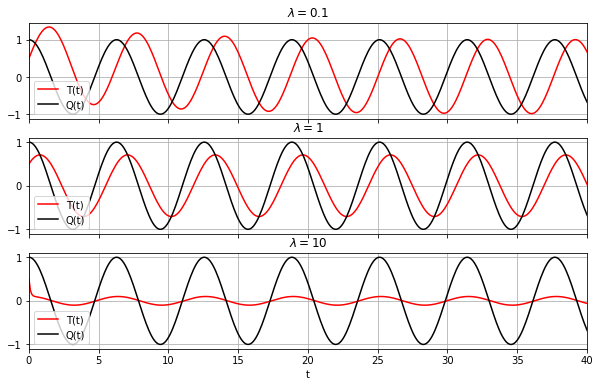

In [7]:
fig, axes = plt.subplots(figsize = (10,6),nrows = 3, ncols = 1, sharex = True)
plot_time_space_subplots(axes[0],0,0.1,0.5,'r')
axes[0].set_title('$\lambda = 0.1$')
plot_time_space_subplots(axes[1],0,1,0.5,'r')
axes[1].set_title('$\lambda = 1$')
plot_time_space_subplots(axes[2],0,10,0.5,'r')
axes[2].set_title('$\lambda = 10$')
axes[2].set_xlabel('t')


Text(0.5, 0, 't')

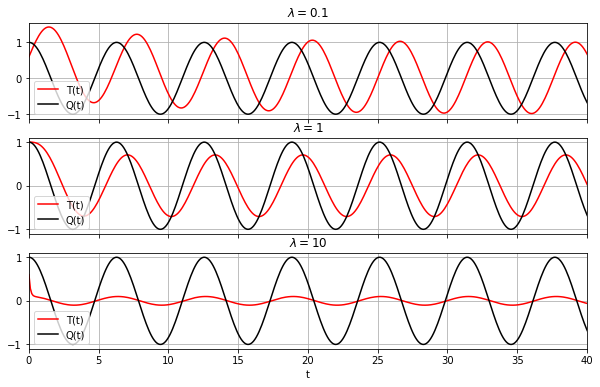

In [9]:
fig, axes = plt.subplots(figsize = (10,6),nrows = 3, ncols = 1, sharex = True)
plot_time_space_subplots_analytic(axes[0],0,0.1,0.5,'r')
axes[0].set_title('$\lambda = 0.1$')
plot_time_space_subplots_analytic(axes[1],0,1,0.5,'r')
axes[1].set_title('$\lambda = 1$')
plot_time_space_subplots_analytic(axes[2],0,10,0.5,'r')
axes[2].set_title('$\lambda = 10$')
axes[2].set_xlabel('t')


### Analytic solution

In [11]:
theta = np.linspace(-10,9.9,1001)
#Q_0 = 0
a = 1
w = 1#/(2*np.pi)
phi = 0

theta_max=0.9950371902099893
phi=1.4711276743037347
theta_max=0.8944271909999159
phi=1.1071487177940904
theta_max=0.7071067811865475
phi=0.7853981633974483
theta_max=0.4472135954999579
phi=0.4636476090008061
theta_max=0.31622776601683794
phi=0.3217505543966422
theta_max=0.19611613513818404
phi=0.19739555984988078
theta_max=0.09950371902099892
phi=0.09966865249116204


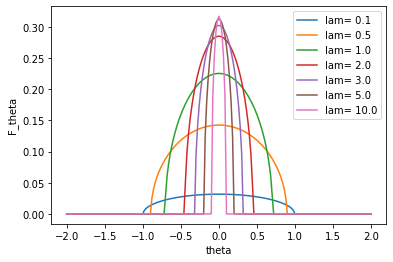

In [12]:
for lam in np.array([0.1,0.5,1,2,3,5,10]):
    theta_max = a/np.sqrt(w**2+lam**2)
    print('theta_max=' +str(theta_max))
    phi = np.arctan(w/lam)
    print('phi='+str(phi))
    theta = np.linspace(-2, 2, 201)

    #print(root1)
    #print(root2)
    F_theta = np.zeros_like(theta)
    for i in range(len(theta)):
        if np.abs(theta[i])>theta_max:
            F_theta[i]=0
        else:
            root1 = 1/w*(np.arccos(theta[i]*np.sqrt(w**2+lam**2)/a)+np.arctan(w/lam))
            root2 = 1/w*(np.pi-np.arccos(theta[i]*np.sqrt(w**2+lam**2))/a+np.arctan(w/lam))
            F_theta[i] = -a/(2*np.pi)*np.sin(w*root1)*np.sign(-w*a/np.sqrt(w**2+lam**2)*np.sin(w*root1-np.arctan(w/lam)))+\
            -a/(2*np.pi)*np.sin(w*root2)*np.sign(-w*a/np.sqrt(w**2+lam**2)*np.sin(w*root2-np.arctan(w/lam)))
                            
    plt.plot(theta,F_theta,label = 'lam= '+str(lam))
plt.ylabel('F_theta')
plt.xlabel('theta')
plt.legend()

--------------------lambda = 1--------------------
Integral from theta_star= 
0.0808091899033074
First Term RHS (Variance Production)= 
0.12381681337073665
--------------------lambda = 2--------------------
Integral from theta_star= 
0.04527443377296388
First Term RHS (Variance Production)= 
0.09599508817673903
--------------------lambda = 3--------------------
Integral from theta_star= 
0.019153208050073714
First Term RHS (Variance Production)= 
0.06573800514431363
--------------------lambda = 5--------------------
Integral from theta_star= 
0.0
First Term RHS (Variance Production)= 
0.0
--------------------lambda = 10--------------------
Integral from theta_star= 
0.0
First Term RHS (Variance Production)= 
0.0


(-1.5, 1.5)

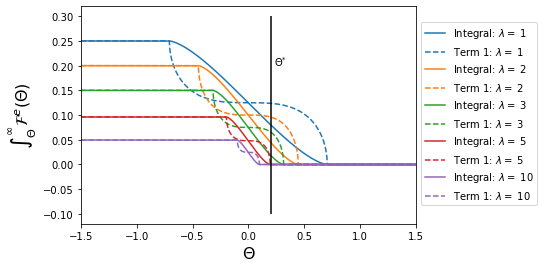

In [13]:
theta_star = 0.2
Q_0 = 0
for j in np.arange(5):
    lam = np.array([1,2,3,5,10])[j]
    color = ['C0','C1','C2','C3','C4'][j]
    print('--------------------lambda = '+str(lam)+'--------------------')
    theta_max = Q_0/lam+a/np.sqrt(w**2+lam**2)
    theta_min = Q_0/lam-a/np.sqrt(w**2+lam**2)
    #print('theta_max=' +str(theta_max))
    phi = np.arctan(w/lam)
    #print('phi='+str(phi))
    theta = np.linspace(-3, 3, 3001)
    dtheta = theta[1]-theta[0]

    F_theta = np.zeros_like(theta)
    for i in range(len(theta)):
        if theta[i]>= theta_max:
            F_theta[i]=Q_0
        elif theta[i]<= theta_min:
            F_theta[i]=0
        else:
            sim = ((Q_0/lam-theta[i])*np.sqrt(w**2+lam**2)/a)
            F_theta[i] = a/(2*np.pi)*(np.sin(np.arccos(sim)+np.arctan(w/lam))+np.sin(np.pi-np.arccos(sim)+np.arctan(w/lam)))*np.sign(np.sin(np.arccos(sim)))+\
            Q_0/(2*np.pi)*(2*np.pi-2*np.arccos(np.sqrt(lam**2+w**2)/a*(theta[i]-Q_0/lam)))
            
    F_theta_bar = np.zeros_like(theta)
    for i in range(len(theta)):
        if theta[i]< Q_0/lam:
            F_theta_bar[i]=0
        else:
            F_theta_bar[i]=Q_0
    F_theta_eddy = F_theta - F_theta_bar
    print('Integral from theta_star= ')
    # sum of F_theta_eddy with heaviside function
    print(np.sum((theta > theta_star)*F_theta_eddy)*dtheta)
    print('First Term RHS (Variance Production)= ')
    # integral over one period from 0 to 2pi, sum of values multiplied by dt, then 1/2pi at the front to dimensionalise
    t = np.linspace(0,2*np.pi,10000)
    dt = t[1]-t[0]
    T = a/np.sqrt(lam**2+w**2)*np.cos(w*t-np.arctan(w/lam))+Q_0/lam
    Q = a*np.cos(w*t)+Q_0
    RHS1 = np.sum((Q-Q_0)*(T-Q_0/lam)*[T>theta_star]*dt/(2*np.pi))
    print(RHS1)
    
    RHS1_temp_space = np.zeros_like(theta)
    for i in range(len(theta)):
        RHS1_temp_space[i] = np.sum((Q-Q_0)*(T-Q_0/lam)*[T>theta[i]]*dt/(2*np.pi))
    np.shape(RHS1_temp_space)
    plt.plot(theta,(np.sum(F_theta_eddy)-np.cumsum(F_theta_eddy))*dtheta,label = 'Integral: $ \lambda = $ '+str(lam),color = color)
    plt.plot(theta,RHS1_temp_space,label = 'Term 1: $\lambda = $ '+str(lam),linestyle = '--',color = color)
plt.ylabel('$\int_\Theta^\infty \mathcal{F}^e(\Theta)$', fontsize = 16)
plt.xlabel('$\Theta$', fontsize = 16)
plt.vlines(theta_star,-0.1,0.3,color = 'k')
plt.text(theta_star+0.03,0.2,'$\Theta^{*}$',)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,0.95))
plt.xlim(-1.5,1.5)

### The Figure

theta_max=0.9950371902099893
phi=1.4711276743037347
2.4757426237673226
2.474632907993655
theta_max=0.7071067811865475
phi=0.7853981633974483
12.502500250024992
12.509712926996091
theta_max=0.09950371902099892
phi=0.09966865249116204
2.4757426237673252
2.3993091034742227


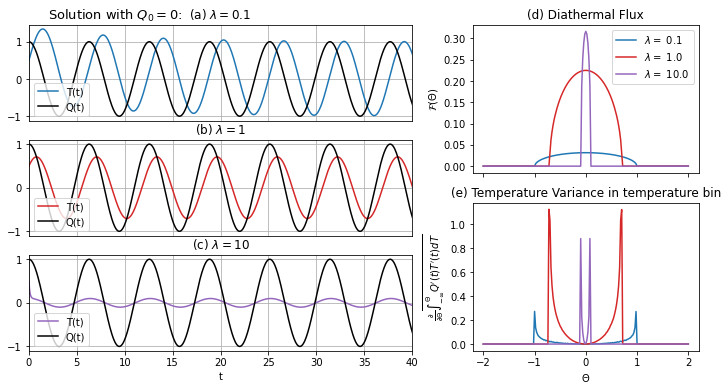

In [21]:
fig = plt.figure(figsize = (12,6))
gs = gridspec.GridSpec(3,2,width_ratios=[1.7, 1]) 
gs2 = gridspec.GridSpec(2,2,width_ratios=[1.7, 1]) 

ax0, ax1, ax2, ax3,ax4 = plt.subplot(gs[0,0]), plt.subplot(gs[1,0]), plt.subplot(gs[2,0]), plt.subplot(gs2[0,1]), plt.subplot(gs2[1,1])
gs.update(wspace = 0.2)

t = np.linspace(0, 50, 1001)
plot_time_space_subplots(ax0,0,0.1,0.5,'C0')
ax0.text(2,1.61,'Solution with $Q_0=0$:', fontsize = 13)
ax0.set_title('(a) $\lambda = 0.1$')
ax0.set_xlabel('')
ax0.tick_params(bottom = False,labelbottom = False)

plot_time_space_subplots(ax1,0,1,0.5,'C3')
ax1.set_title('(b) $ \lambda = 1$')
ax1.set_xlabel('')
ax1.tick_params(bottom = False,labelbottom = False)

plot_time_space_subplots(ax2,0,10,0.5,'C4')
ax2.set_title('(c) $ \lambda = 10$')
ax2.set_xlabel('t')

theta = np.linspace(-10,9.9,1001)
#Q_0 = 0
a = 1
w = 1#/(2*np.pi)
phi = 0
for j in np.arange(3):
    lam = np.array([0.1,1,10])[j]
    color = ['C0','C3','C4','C5','C3','C4'][j]
    theta_max = a/np.sqrt(w**2+lam**2)
    print('theta_max=' +str(theta_max))
    phi = np.arctan(w/lam)
    print('phi='+str(phi))
    theta = np.linspace(-2, 2, 201)
    dtheta = theta[1]-theta[0]

    # calculate F_theta based on analytic solution
    F_theta = np.zeros_like(theta)
    for i in range(len(theta)):
        if np.abs(theta[i])>theta_max:
            F_theta[i]=0
        else:
            root1 = 1/w*(np.arccos(theta[i]*np.sqrt(w**2+lam**2)/a)+np.arctan(w/lam))
            root2 = 1/w*(np.pi-np.arccos(theta[i]*np.sqrt(w**2+lam**2))/a+np.arctan(w/lam))
            F_theta[i] = -a/(2*np.pi)*np.sin(w*root1)*np.sign(-w*a/np.sqrt(w**2+lam**2)*np.sin(w*root1-np.arctan(w/lam)))+\
            -a/(2*np.pi)*np.sin(w*root2)*np.sign(-w*a/np.sqrt(w**2+lam**2)*np.sin(w*root2-np.arctan(w/lam)))
    # calculate temp correlation in given bin
    t = np.linspace(0,2*np.pi,10000)
    dt = t[1]-t[0]
    T = a/np.sqrt(lam**2+w**2)*np.cos(w*t-np.arctan(w/lam))+Q_0/lam
    Q = a*np.cos(w*t)+Q_0
    RHS1_temp_space = np.zeros_like(theta)
    for i in range(len(theta)-1):
        RHS1_temp_space[i] = np.sum((Q-Q_0)*(T-Q_0/lam)*[T>theta[i]]*[theta[i+1]>=T]*dt/(2*np.pi))/dtheta
    # plot
    ax3.plot(theta,F_theta,label = '$\lambda=$ '+str(lam), color = color)
    ax4.plot(theta,RHS1_temp_space,label = 'Variance in bin $\lambda = $ '+str(lam),color = color)
    print(np.sum(RHS1_temp_space))
    print(np.sum(F_theta))
                            
ax3.set_ylabel('$\mathcal{F}(\Theta)$')
ax3.set_xlabel('')
ax3.legend()
ax3.set_title('(d) Diathermal Flux')
ax3.tick_params(labelbottom = False)

ax4.set_ylabel(r'$\frac{\partial}{\partial \Theta}\overline{\int^{\Theta}_{-\infty} Q^\prime(t)T^\prime(t)dT}$')
ax4.set_xlabel('$\Theta$')
ax4.set_title('(e) Temperature Variance in temperature bin')

fig.savefig('0D_Summary.png',dpi = 200)

In [ ]:
w*a**2/(2*np.sqrt(lam**2+w**2))*np.cos(np.arctan(w/lam)))

In [ ]:
w*a**2/(2*np.sqrt(lam**2+w**2))*np.cos(np.arctan(w/lam)))